<a href="https://colab.research.google.com/github/noemicho/pokeAPI/blob/main/DesafioParte1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Desafio Técnico - pokeAPI**

#### Escolhendo Pokemon aleatório para visualizar os nomes das colunas

In [52]:
# Importando bibliotecas
import requests
import pandas as pd

# URL do pokemon Bulbasaur
url_bulbasaur = "https://pokeapi.co/api/v2/pokemon/bulbasaur"

response = requests.get(url_bulbasaur)

# Se a requisição da API for ok, transformar dados para JSON
if response.status_code == 200:
    print("Requisição OK")
    data_bulbasaur = response.json()
else:
    print(f"Erro: {response.status_code}")

# Listando as colunas dos dados dos Pokemons
print(data_bulbasaur.keys())


Requisição OK
dict_keys(['abilities', 'base_experience', 'cries', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_abilities', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])


#### Criando Dataframe com amostra de 151 pokemons (Primeira Geração de Pokemon)

In [53]:
# Função para pegar dados de um Pokemon pelo id
def get_pokemon_data(pokemon_id):
    url = f"https://pokeapi.co/api/v2/pokemon/{pokemon_id}"
    response = requests.get(url)
    return response.json() if response.status_code == 200 else None

pokemon_list = []

# Definindo intervalo para quantidade de pokemons
for pokemon_id in range(1, 152):
    data = get_pokemon_data(pokemon_id)

    # Se a requisição foi ok
    if data:
        pokemon_data = {
            "name": data["name"],
            "id": data["id"],
            "weight": data["weight"],
            "height": data["height"],
            "XP": data["base_experience"],
            "abilities": [h["ability"]["name"] for h in data["abilities"]],
            "moves": [m["move"]["name"] for m in data["moves"]],
            "types": [t["type"]["name"] for t in data["types"]]
        }
        pokemon_list.append(pokemon_data)
    else:
        print("Erro em coletar dados...")

# Tranformando em DataFrame
df = pd.DataFrame(pokemon_list)
print(df)


           name   id  weight  height   XP                  abilities  \
0     bulbasaur    1      69       7   64    [overgrow, chlorophyll]   
1       ivysaur    2     130      10  142    [overgrow, chlorophyll]   
2      venusaur    3    1000      20  263    [overgrow, chlorophyll]   
3    charmander    4      85       6   62       [blaze, solar-power]   
4    charmeleon    5     190      11  142       [blaze, solar-power]   
..          ...  ...     ...     ...  ...                        ...   
146     dratini  147      33      18   60  [shed-skin, marvel-scale]   
147   dragonair  148     165      40  147  [shed-skin, marvel-scale]   
148   dragonite  149    2100      22  300  [inner-focus, multiscale]   
149      mewtwo  150    1220      20  340        [pressure, unnerve]   
150         mew  151      40       4  300              [synchronize]   

                                                 moves             types  
0    [razor-wind, swords-dance, cut, bind, vine-whi...   [gr

### **Visualizando os dados dos Pokemons**

In [54]:
# Bibliotecas para visualizar os dados com gráficos
import matplotlib.pyplot as plt

#### I) Distribuição dos tipos dos Pokemons (considerando pokemons com mais de um tipo)

In [55]:
# Quebrando a coluna 'types' para o respectivo pokemon e contando quantos tem de cada tipo
df_tipos = df.explode('types')
tipos_qnt = df_tipos['types'].value_counts()

print("Quantidade de cada tipo:")
print(tipos_qnt)

Quantidade de cada tipo:
types
poison      33
water       32
normal      22
flying      19
grass       14
psychic     14
ground      14
bug         12
fire        12
rock        11
electric     9
fighting     8
fairy        5
ice          5
ghost        3
dragon       3
steel        2
Name: count, dtype: int64


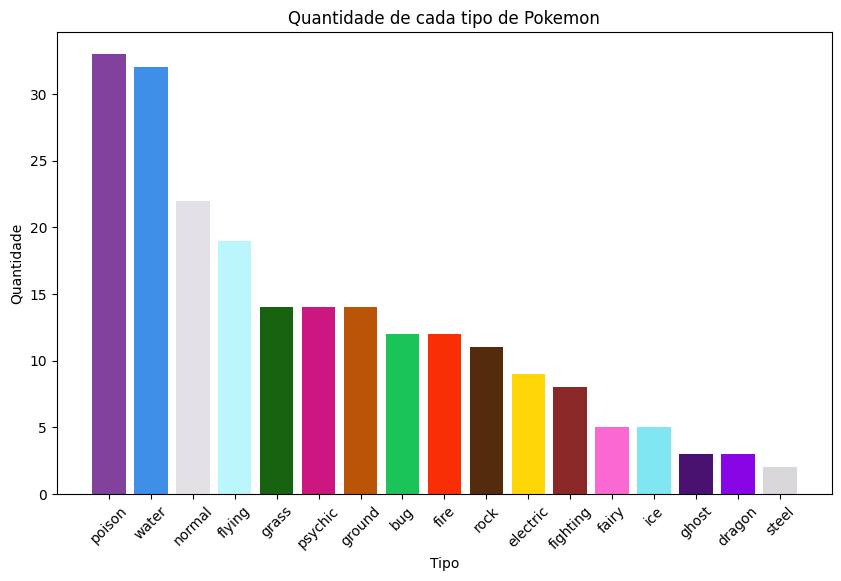

In [56]:
# Gráfico de Barras para quantidade de cada tipo de Pokemon

colors = [
    "#82419c",  # poison
    "#3f8ee8",  # water
    "#e4e1e6",  # normal
    "#bbf6fc",  # flying
    "#176310",  # grass
    "#cc1680",  # psychic
    "#ba5406",  # ground
    "#1bc459",  # bug
    "#fa2e05",  # fire
    "#542c0d",  # rock
    "#ffd608",  # electric
    "#8a2828",  # fighting
    "#fc68d2",  # fairy
    "#80e7f2",  # ice
    "#491270",  # ghost
    "#8805e6",  # dragon
    "#d9d7db",  # steel
]

plt.figure(figsize=(10, 6))
plt.bar(tipos_qnt.index, tipos_qnt.values, color=colors)
plt.title('Quantidade de cada tipo de Pokemon')
plt.xlabel('Tipo')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()


#### II) Distribuição dos tipos dos Pokemons (considerando apenas os **tipos primários**)

In [68]:
# Adicionando nova coluna com valor apenas do tipo primário do Pokemon
df['primary_type'] = df['types'].apply(lambda p: p[0])

print("Tipo Primário de cada Pokemon:")
print(df[['primary_type', 'types']])


Tipo Primário de cada Pokemon:
    primary_type             types
0          grass   [grass, poison]
1          grass   [grass, poison]
2          grass   [grass, poison]
3           fire            [fire]
4           fire            [fire]
..           ...               ...
146       dragon          [dragon]
147       dragon          [dragon]
148       dragon  [dragon, flying]
149      psychic         [psychic]
150      psychic         [psychic]

[151 rows x 2 columns]
